<h1 style="color: #00BFFF;">00 |</h1>

In [26]:
# 📚 Basic libraries
import pandas as pd # data manipulation
import numpy as np # numerical operations
import os # file managment
import warnings # warnings managment
import matplotlib.pyplot as plt # 2D visualizations
import seaborn as sns # high-resolution visualization

# 🤖 Machine Learning
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # train/test sets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Regressors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

In [2]:
# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

In [3]:
# 🎯 Specific functions
def explore_data(data): # sum & returns duplicates, NaN & empty spaces
    duplicate_rows = data.duplicated().sum()
    nan_values = data.isna().sum()
    empty_spaces = data.eq(' ').sum()
    import pandas as pd
    exploration = pd.DataFrame({"NaN": nan_values, "EmptySpaces": empty_spaces}) # New dataframe with the results
    print(f"There are {data.duplicated().sum()} duplicate rows. Also;")
    return exploration

def outlier_slayer(data): # automatically removes outliers based on Q1, Q3
    for column in data.select_dtypes(include=[np.number]):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

def remove_outliers_iqr(df, columns, threshold=1.5):
    df_outliers_removed = df.copy()
    for column in columns:
        q1, q3 = np.percentile(df[column], [25, 75])
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        df_outliers_removed = df_outliers_removed[(df_outliers_removed[column] >= lower_bound) & (df_outliers_removed[column] <= upper_bound)]
    return df_outliers_removed


<h1 style="color: #00BFFF;">05 | Improving the Model</h1>

<h2 style="color: #008080;">Data Extraction</h2>

In [4]:
file_path = os.path.join("/Users/jesus/Desktop/Ironhack/MidBootcamp Project/name-pending/00_data", "cleaned.csv")
cleaned = pd.read_csv(file_path, index_col=0) # to deal with an error `Unnamed: 0` column

In [5]:
# We will re-use this code for 05_impriving_the_model, to slowly fine-tunning the model
house_pearson = cleaned[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'price']]

house_chai = cleaned[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'price']]

house_spearman = cleaned[['condition', 'grade', 'price']]

<h3 style="color: #00BFFF;">#02 Model: "Patent-pending 02"</h3>

* For this first attempt to improve the model, we will just simply remove the obvious outliers.

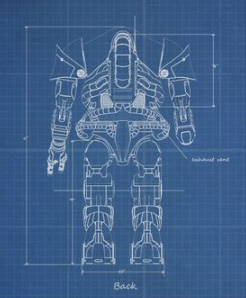

<h2 style="color: #008080;">Dealing with Outliers</h2>

In [6]:
# We will check all features, except for month encoded
house_features = cleaned[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15', 'price']]

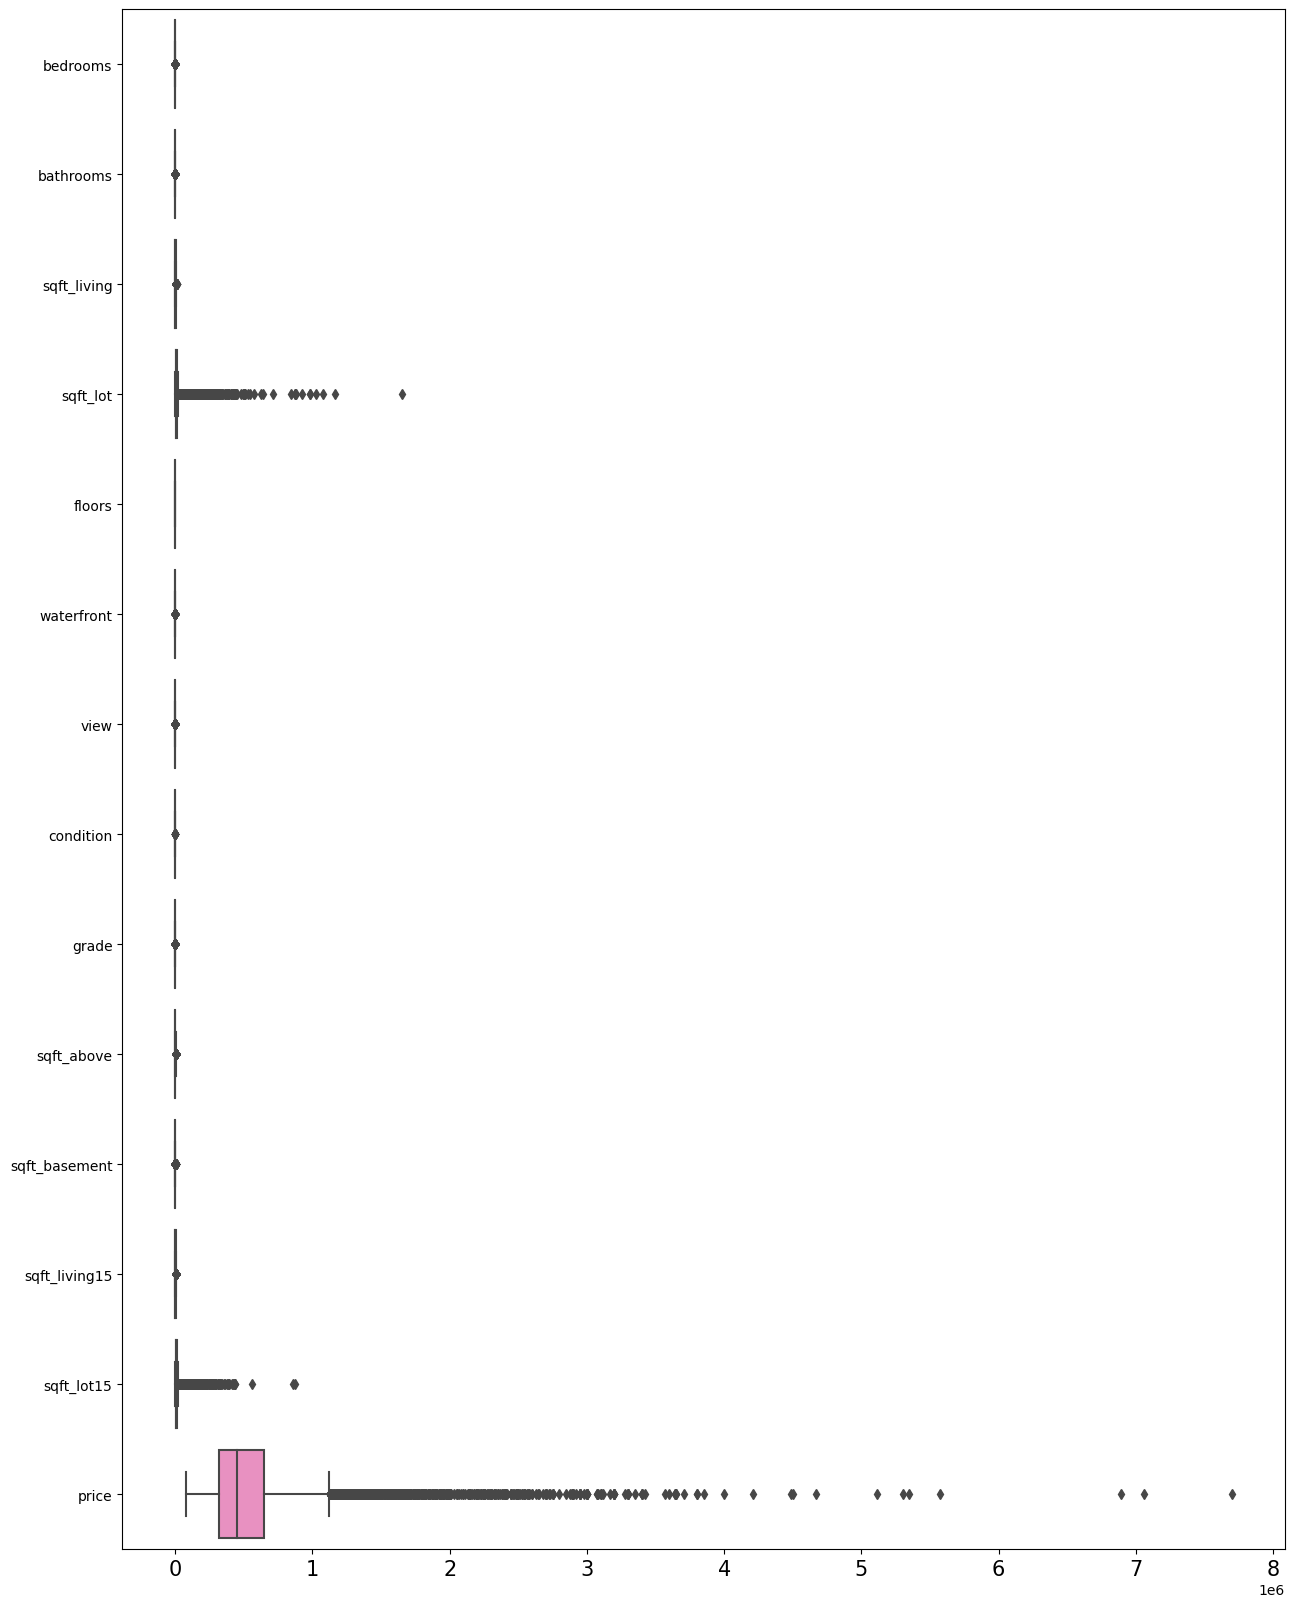

In [7]:
# For house_features variable used while checking Data distributions
fig, ax = plt.subplots(figsize=(15, 20))
sns.boxplot(data=house_features, orient="h", ax=ax, showfliers=True, whis=1.5)
ax.tick_params(axis='x', labelsize=15) # Adjust the font size of the x-axis ticks
# Show the plot
plt.show()

In [8]:
house_features = outlier_slayer(house_features)

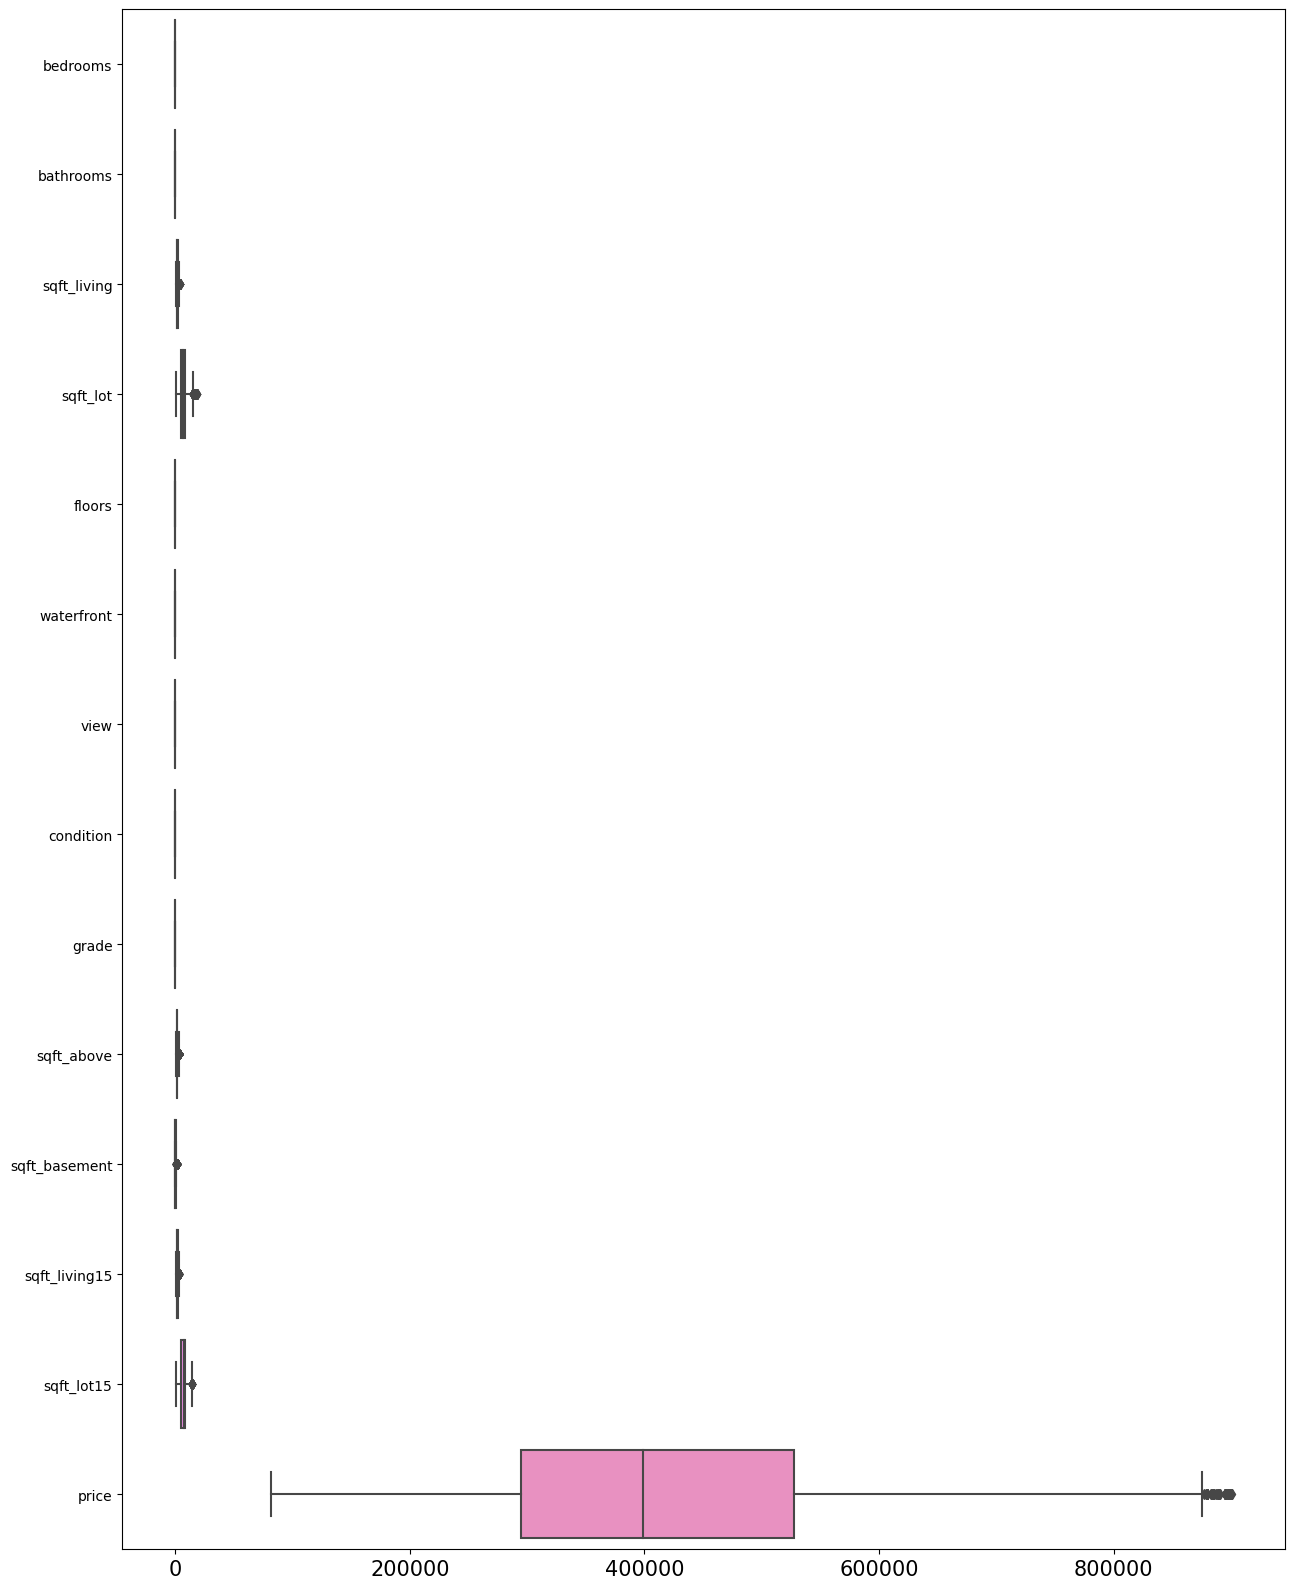

In [9]:
fig, ax = plt.subplots(figsize=(15, 20))
sns.boxplot(data=house_features, orient="h", ax=ax, showfliers=True, whis=1.5)
ax.tick_params(axis='x', labelsize=15) # Adjust the font size of the x-axis ticks
# Show the plot
plt.show()

In [10]:
# Now we are able to predict higher property value - $650K.

<h2 style="color: #008080;">Updating the df</h2>

In [11]:
cleaned.update(house_features)

<h2 style="color: #008080;">Improving it's an iteration process...</h2>

In [12]:
df2 = cleaned

In [13]:
# Split the data into input and target variables
X = df2.drop("price", axis=1)
y = df2["price"]

# Normalizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
# test_size = We give 30% for testing and 70% for testing
# random_state = it'll improve the model to divide always the model in the same way

# Model fit
model = LinearRegression() # We pick our model
model.fit(X_train,y_train) # We fit the training data into the model

# Train data for the model
model.fit(X_train,y_train) # We fit the training data into the model

# Predictions
predictions = model.predict(X_test)

r2_3 = r2_score(y_test, predictions)
RMSE_3 = mean_squared_error(y_test, predictions, squared=False)
MSE_3 = mean_squared_error(y_test, predictions)
MAE_3 = mean_absolute_error(y_test, predictions)

#Printing the results
print("R2 = ", round(r2_3, 4))
print("RMSE = ", round(RMSE_3, 4))
print("The value of the metric MSE is ", round(MSE_3, 4))
print("MAE = ", round(MAE_3, 4))

R2 =  0.6323
RMSE =  218925.2042
The value of the metric MSE is  47928245019.6408
MAE =  141765.3872


<blockquote style="background-color: #ffeeba; color: #856404; border-color: #ffeeba; padding: 10px; border-radius: 5px;">
    
* Removing outliers was an important step, but it did not significally improved our model. 
* Instead, it's slightly worst if we compare it from before:
    
</blockquote>
    
<table border="1">
  <thead>
    <tr>
      <th></th>
      <th>First Model</th>
      <th>Patent-Pending 02</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>R2</td>
      <td>0.6326</td>
      <td>0.6323</td>
    </tr>
    <tr>
      <td>RMSE</td>
      <td>218841.0967</td>
      <td>218923.5864</td>
    </tr>
    <tr>
      <td>MSE</td>
      <td>47891425625.3193</td>
      <td>47927536689.4592</td>
    </tr>
    <tr>
      <td>MAE</td>
      <td>141684.4693</td>
      <td>141766.2985</td>
    </tr>
  </tbody>
</table>

<h3 style="color: #00BFFF;">#03 Model: "Patent-pending 03"</h3>

* We will use the same `cleaned` dataset used in "patent-pending 02", now to deal with Data Distributions to see what will happen:

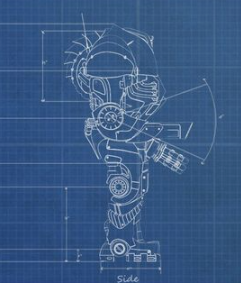

<h2 style="color: #008080;">Dealing Data distributions</h2>

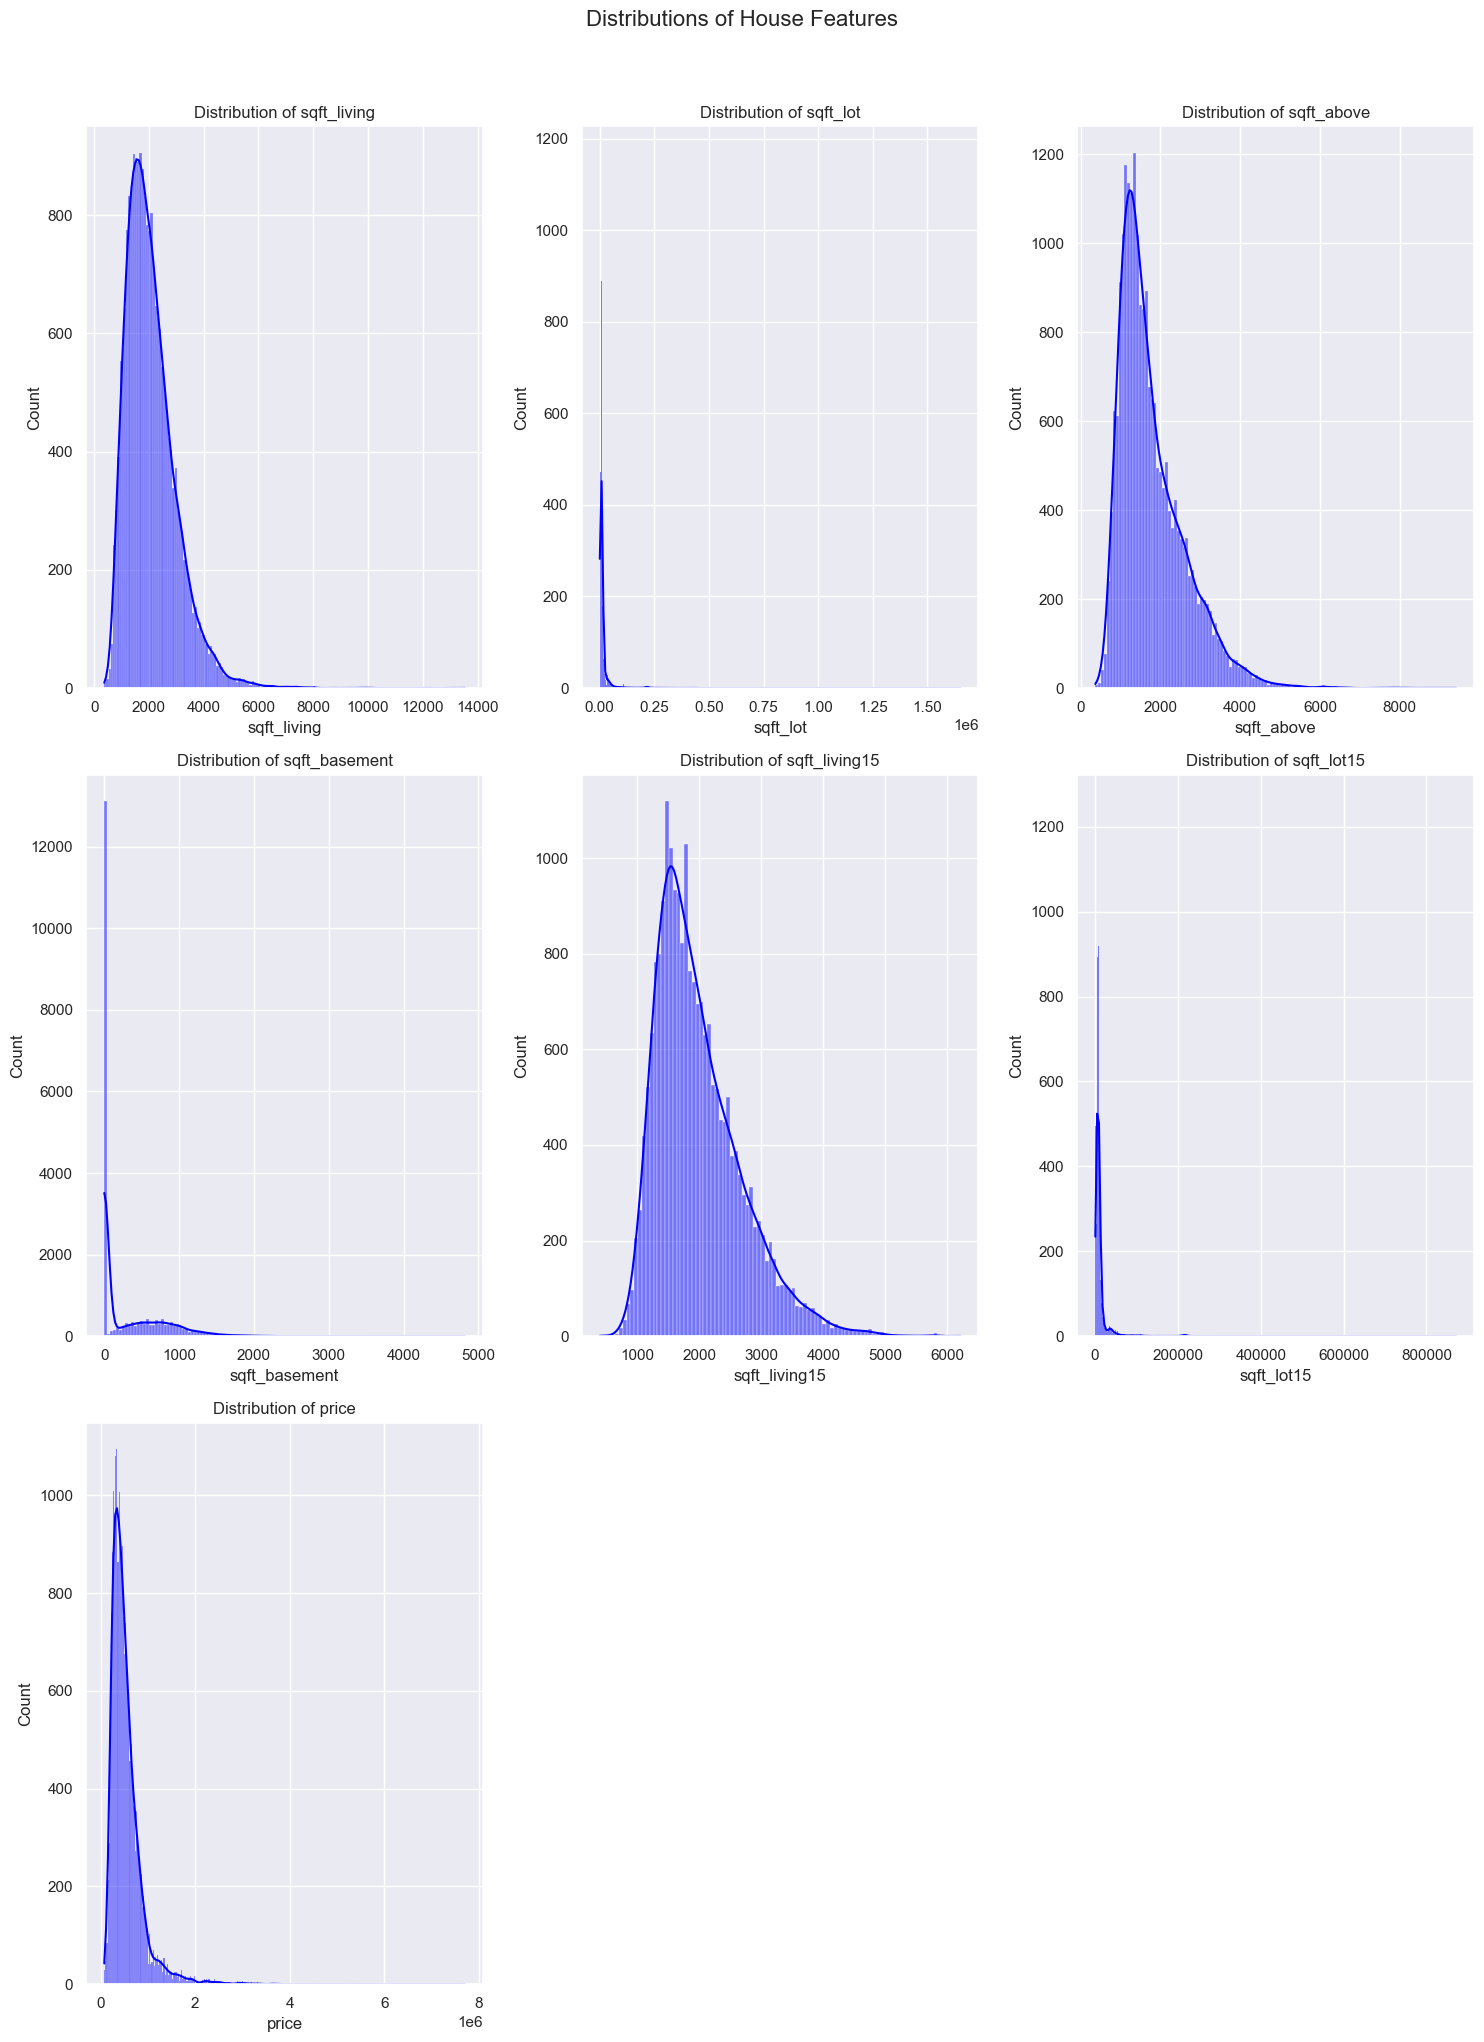

In [14]:
# Dark background
sns.set(style="darkgrid")

# Number of rows and columns for the grid
n_features = len(house_pearson.columns)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

# Grid of histograms
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20))
axes = axes.flatten()

for i, column in enumerate(house_pearson.columns):
    sns.histplot(data=house_pearson, x=column, kde=True, color="blue", ax=axes[i])
    axes[i].set_title(f"Distribution of {column}")

# Removing empty subplots
for i in range(len(house_pearson.columns), n_rows * n_cols):
    fig.delaxes(axes[i])

fig.suptitle("Distributions of House Features", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [15]:
# After removing outliers, data looks more normal distributed if we compared it to the 03_eda script
# We will first apply log transformations to `sqft_living`, `sqft_above`, `sqft_living15`, `sqft_lot15` and `price`

In [16]:
log_features = ['sqft_living', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'price']
for column in log_features:
    house_features[column] = np.log(house_features[column])

<h2 style="color: #008080;">Updating the df</h2>

In [17]:
cleaned.update(house_features)

<h2 style="color: #008080;">Improving it's an iteration process...</h2>

In [18]:
df3 = cleaned

In [19]:
# Split the data into input and target variables
X = df3.drop("price", axis=1)
y = df3["price"]

# Normalizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
# test_size = We give 30% for testing and 70% for testing
# random_state = it'll improve the model to divide always the model in the same way

# Model fit
model = LinearRegression() # We pick our model
model.fit(X_train,y_train) # We fit the training data into the model

# Train data for the model
model.fit(X_train,y_train) # We fit the training data into the model

# Predictions
predictions = model.predict(X_test)

r2_3 = r2_score(y_test, predictions)
RMSE_3 = mean_squared_error(y_test, predictions, squared=False)
MSE_3 = mean_squared_error(y_test, predictions)
MAE_3 = mean_absolute_error(y_test, predictions)

#Printing the results
print("R2 = ", round(r2_3, 4))
print("RMSE = ", round(RMSE_3, 4))
print("The value of the metric MSE is ", round(MSE_3, 4))
print("MAE = ", round(MAE_3, 4))

R2 =  0.8237
RMSE =  194499.5709
The value of the metric MSE is  37830083069.5626
MAE =  100364.5702


<blockquote style="background-color: #ffeeba; color: #856404; border-color: #ffeeba; padding: 10px; border-radius: 5px;">
    
* So, after applying log transform to some bell-shape distributions highly improved our model.
* `Patern-Pending 03` model seems to be better... can we improve it even further?
    
</blockquote>
    
<table border="1">
  <thead>
    <tr>
      <th></th>
      <th>First Model</th>
      <th>Patent-Pending 02</th>
      <th>Patent-Pending 03</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>R2</td>
      <td>0.6326</td>
      <td>0.6323</td>
      <td>0.8237</td>
    </tr>
    <tr>
      <td>RMSE</td>
      <td>218841.0967</td>
      <td>218923.5864</td>
      <td>194499.5709</td>
    </tr>
    <tr>
      <td>MSE</td>
      <td>47891425625.3193</td>
      <td>47927536689.4592</td>
      <td>37830083069.5626</td>
    </tr>
    <tr>
      <td>MAE</td>
      <td>141684.4693</td>
      <td>141766.2985</td>
      <td>100364.5702</td>
    </tr>
  </tbody>
</table>

<h3 style="color: #00BFFF;">#04 Model: "Patent-pending 04"</h3>

* We dealt with outliers and basic data normalization distributions.
* Now we will check all correlation matrixes.

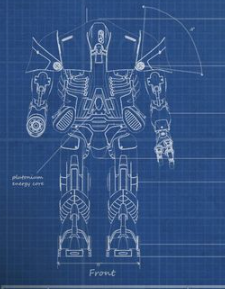

<h2 style="color: #008080;">Checking Multicollinearity</h2>

In [20]:
# Creating the Pearson matrix
house_matrix = round(house_pearson.corr(), 4)

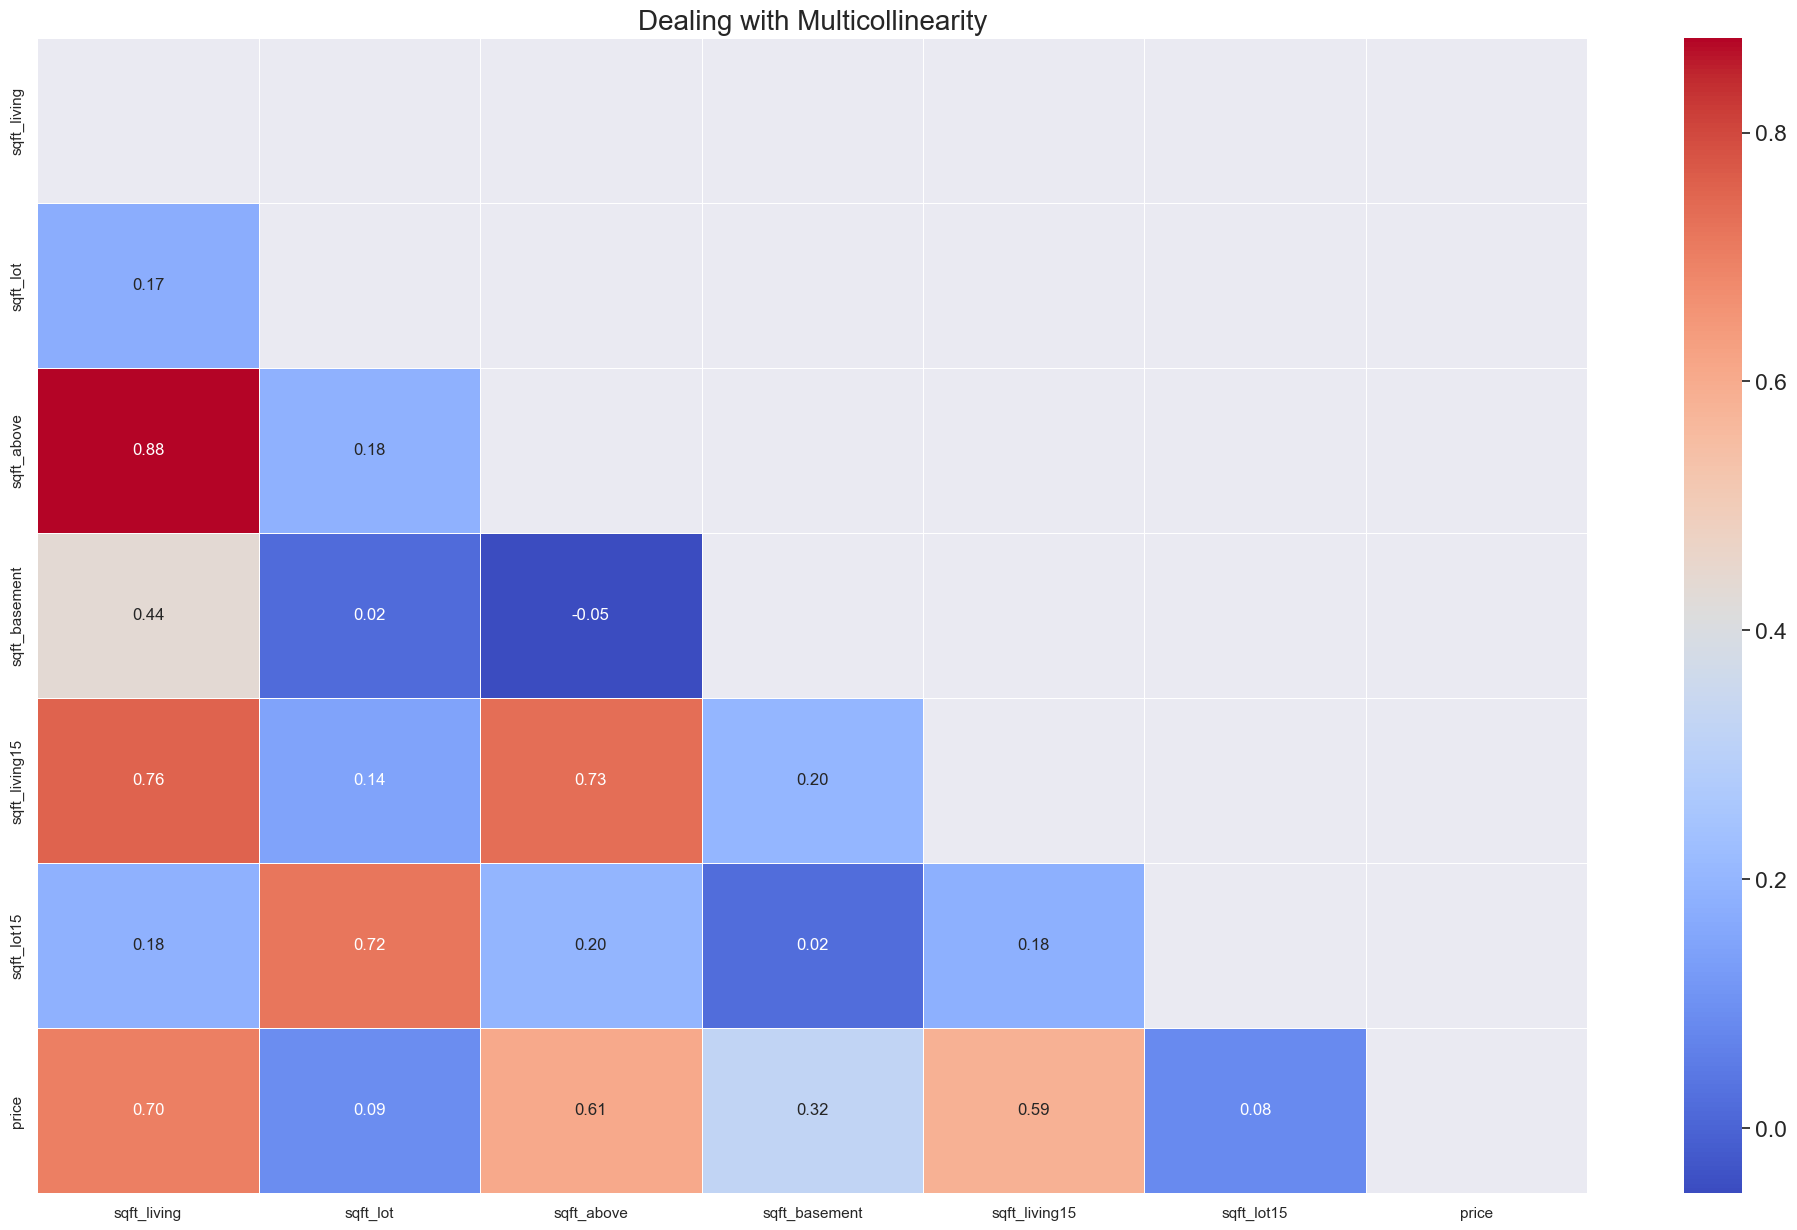

In [21]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(house_matrix)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size
ax = sns.heatmap(house_matrix, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

<h2 style="color: #008080;">Updating the df</h2>

In [22]:
cleaned.update(house_features)

<h2 style="color: #008080;">Improving it's an iteration process...</h2>

In [23]:
df4 = cleaned

In [24]:
# Split the data into input and target variables
X = df4.drop("price", axis=1)
y = df4["price"]

# Normalizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
# test_size = We give 30% for testing and 70% for testing
# random_state = it'll improve the model to divide always the model in the same way

# Model fit
model = LinearRegression() # We pick our model
model.fit(X_train,y_train) # We fit the training data into the model

# Train data for the model
model.fit(X_train,y_train) # We fit the training data into the model

# Predictions
predictions = model.predict(X_test)

r2_3 = r2_score(y_test, predictions)
RMSE_3 = mean_squared_error(y_test, predictions, squared=False)
MSE_3 = mean_squared_error(y_test, predictions)
MAE_3 = mean_absolute_error(y_test, predictions)

#Printing the results
print("R2 = ", round(r2_3, 4))
print("RMSE = ", round(RMSE_3, 4))
print("The value of the metric MSE is ", round(MSE_3, 4))
print("MAE = ", round(MAE_3, 4))

R2 =  0.8237
RMSE =  194499.5709
The value of the metric MSE is  37830083069.5626
MAE =  100364.5702


<blockquote style="background-color: #ffeeba; color: #856404; border-color: #ffeeba; padding: 10px; border-radius: 5px;">
    
* 
    
</blockquote>
    
<table border="1">
  <thead>
    <tr>
      <th></th>
      <th>First Model</th>
      <th>Patent-Pending 02</th>
      <th>Patent-Pending 03</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>R2</td>
      <td>0.6326</td>
      <td>0.6323</td>
      <td>0.8237</td>
    </tr>
    <tr>
      <td>RMSE</td>
      <td>218841.0967</td>
      <td>218923.5864</td>
      <td>194499.5709</td>
    </tr>
    <tr>
      <td>MSE</td>
      <td>47891425625.3193</td>
      <td>47927536689.4592</td>
      <td>37830083069.5626</td>
    </tr>
    <tr>
      <td>MAE</td>
      <td>141684.4693</td>
      <td>141766.2985</td>
      <td>100364.5702</td>
    </tr>
  </tbody>
</table>

<h2 style="color: #008080;">Testing Regressors</h2>

### First we are going to get the best number of neighbours

In [27]:
scores = []
scores2 = []# We will store here the R2 values for each of our K-NN models with different K-values.
for i in range(4,40): 
    knn_model = KNeighborsRegressor(n_neighbors=i)
    knn_model2 = KNeighborsRegressor(n_neighbors=i, weights='distance')
    knn_model.fit(X_train, y_train)
    knn_model2.fit(X_train, y_train)
    scores.append(knn_model.score(X_test, y_test))
    scores2.append(knn_model2.score(X_test, y_test))

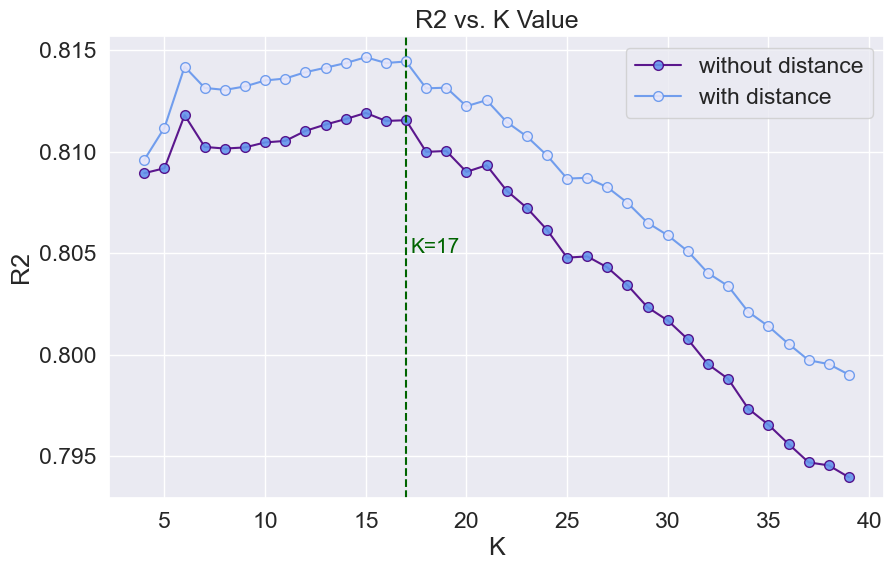

In [28]:
plt.figure(figsize=(10,6))
plt.plot(range(4,40), scores, color = 'indigo', linestyle='-',
         marker='o', markerfacecolor='cornflowerblue', markersize=7, label='without distance', alpha=0.9)
plt.plot(range(4,40), scores2, color = 'cornflowerblue', linestyle='-',
         marker='o', markerfacecolor='lavender', markersize=7, label='with distance', alpha=0.9)
#Add vertical line in k=17
plt.axvline(x=17, color='darkgreen', linestyle='dashed')
# Add text to the vertical line
plt.text(17.2, 0.805, "K=17", color='darkgreen', fontsize=15)

plt.title('R2 vs. K Value')
plt.xlabel('K')
plt.ylabel('R2')
plt.legend()
plt.show()

<blockquote style="background-color: #ffeeba; color: #856404; border-color: #ffeeba; padding: 10px; border-radius: 5px;">
    
K = 17 is the best fit for the KNN regressor.
    
</blockquote>

In [29]:
def testing(models_list):
    for i in models_list:
        model = i
        model.fit(X_train,y_train)
        predictions=model.predict(X_test)
        MAE = mean_absolute_error(y_test,predictions)
        MSE = mean_squared_error(y_test,predictions)
        RMSE = np.sqrt(MSE)
        R2 = r2_score(y_test,predictions)
        R2_adj = 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
        print("-------------------------")
        print('\033[1m' + "Using the model: " + str(model) + '\033[0m')
        print("The mean absolute error is: %6.3f" % (MAE))
        print("The mean squared error is: %6.3f" % (MSE))
        print("The root mean squared error is: %6.3f" % (RMSE))
        print("The R2 is: %6.3f" % (R2))
        print("The Adjusted R2 is: %6.3f" % (R2_adj))

In [30]:

models=[
    LinearRegression(),
    KNeighborsRegressor(n_neighbors=17),
    KNeighborsRegressor(n_neighbors=17, weights = "distance"),
    MLPRegressor(hidden_layer_sizes=(5,), activation='relu', solver='adam', max_iter=1000),
    MLPRegressor(hidden_layer_sizes=(5, 5, 5), activation='relu', solver='adam', max_iter=1000),
    MLPRegressor(hidden_layer_sizes=(10, 5), activation='relu', solver='adam', max_iter=1000),
    DecisionTreeRegressor(), # just trying new things
    RandomForestRegressor(),
    SVR()
]

In [31]:
testing(models)

-------------------------
Using the model: LinearRegression()
The mean absolute error is: 100364.570
The mean squared error is: 37830083069.563
The root mean squared error is: 194499.571
The R2 is:  0.824
The Adjusted R2 is:  0.823
-------------------------
Using the model: KNeighborsRegressor(n_neighbors=17)
The mean absolute error is: 70934.614
The mean squared error is: 40426960396.539
The root mean squared error is: 201064.568
The R2 is:  0.812
The Adjusted R2 is:  0.811
-------------------------
Using the model: KNeighborsRegressor(n_neighbors=17, weights='distance')
The mean absolute error is: 69792.325
The mean squared error is: 39806350604.902
The root mean squared error is: 199515.289
The R2 is:  0.814
The Adjusted R2 is:  0.814
-------------------------
Using the model: MLPRegressor(hidden_layer_sizes=(5,), max_iter=1000)
The mean absolute error is: 200685.507
The mean squared error is: 185590589639.889
The root mean squared error is: 430802.263
The R2 is:  0.135
The Adjusted

### Let's dig into MLPRegressor, RandomForestRegressor and ElasticNet

In [32]:
from sklearn.linear_model import ElasticNet
models2=[
    MLPRegressor(hidden_layer_sizes=(10,5,5), activation='relu', solver='adam', max_iter=2000),
    RandomForestRegressor(),
    ElasticNet(alpha=0.001, l1_ratio=0.7)
]

In [33]:
testing(models2)

-------------------------
Using the model: MLPRegressor(hidden_layer_sizes=(10, 5, 5), max_iter=2000)
The mean absolute error is: 67119.366
The mean squared error is: 27423533858.778
The root mean squared error is: 165600.525
The R2 is:  0.872
The Adjusted R2 is:  0.872
-------------------------
Using the model: RandomForestRegressor()
The mean absolute error is: 57965.958
The mean squared error is: 26464545541.069
The root mean squared error is: 162679.272
The R2 is:  0.877
The Adjusted R2 is:  0.876
-------------------------
Using the model: ElasticNet(alpha=0.001, l1_ratio=0.7)
The mean absolute error is: 100335.590
The mean squared error is: 37831121216.117
The root mean squared error is: 194502.240
The R2 is:  0.824
The Adjusted R2 is:  0.823


<h2 style="color: #008080;">Definitely choosing one</h2>

In [54]:
# Apply the remove_outliers_iqr function to the 'column1' and 'column2' columns with a threshold of 1.5
df5 = remove_outliers_iqr(df4, ['price'], threshold=1.5)

# Print the results
print('Original data:\n', df4.shape)
print('Data without outliers:\n', df5.shape)

Original data:
 (21595, 28)
Data without outliers:
 (20437, 28)


In [93]:
X = df5.drop("price", axis=1)
y = df5["price"]

# Normalizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [56]:
FinalModel = RandomForestRegressor()
FinalModel.fit(X_train, y_train)
Predictions=FinalModel.predict(X_test)

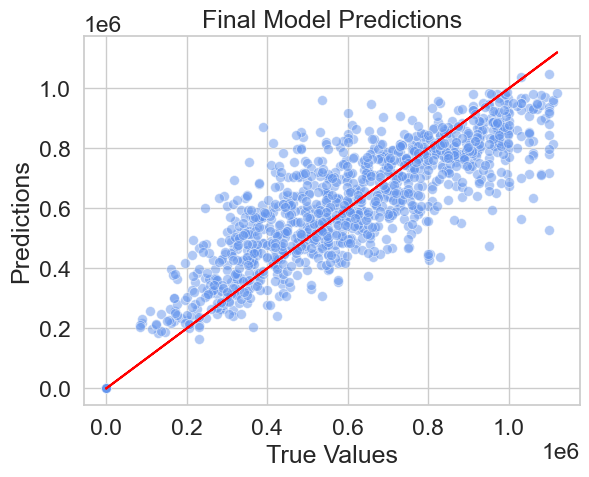

-------------------------
Using the model: RandomForestRegressor()
The mean absolute error is: 30527.500
The mean squared error is: 5443557991.828
The root mean squared error is: 73780.472
The R2 is:  0.942
The Adjusted R2 is:  0.942


In [57]:
sns.set_style('whitegrid')
# plot the predictions
sns.scatterplot(x=y_test, y=Predictions, s=50, alpha=0.5, color='cornflowerblue')

# plot the ideal predictions line
plt.plot(y_test, y_test, color='red', linestyle='-')

# set the title and labels
plt.title('Final Model Predictions')
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.show()

MAE = mean_absolute_error(y_test,Predictions)
MSE = mean_squared_error(y_test,Predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,Predictions)
R2_adj = 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("-------------------------")
print('\033[1m' + "Using the model: " + str(FinalModel) + '\033[0m')
print("The mean absolute error is: %6.3f" % (MAE))
print("The mean squared error is: %6.3f" % (MSE))
print("The root mean squared error is: %6.3f" % (RMSE))
print("The R2 is: %6.3f" % (R2))
print("The Adjusted R2 is: %6.3f" % (R2_adj))

## Let's see the importance of the features

Text(0.5, 0, 'Random Forest Feature Importance')

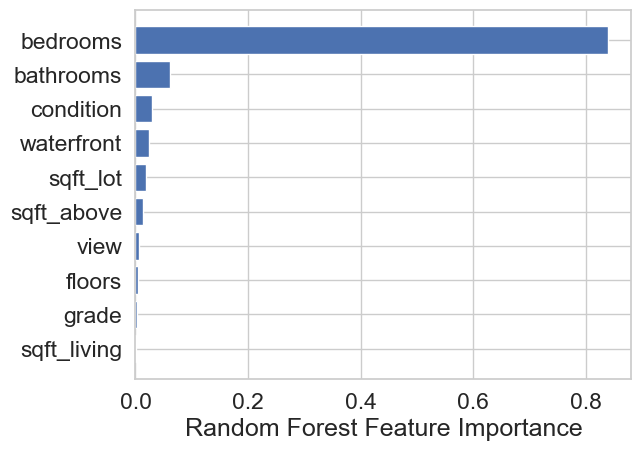

In [90]:

# Fit a linear regression model to the data
rf = RandomForestRegressor()

rf.fit(X_train, y_train)

sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## Can we have a similiar performance with only the top 10?

In [91]:
X.columns[sorted_idx]

Index(['sqft_living', 'grade', 'floors', 'view', 'sqft_above', 'sqft_lot',
       'waterfront', 'condition', 'bathrooms', 'bedrooms'],
      dtype='object')

In [94]:
X_scaled = X_scaled[['sqft_living', 'grade', 'floors', 'view', 'sqft_above', 'sqft_lot',
       'waterfront', 'condition', 'bathrooms', 'bedrooms']]

In [95]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [96]:
FinalModel = RandomForestRegressor()
FinalModel.fit(X_train, y_train)
Predictions=FinalModel.predict(X_test)

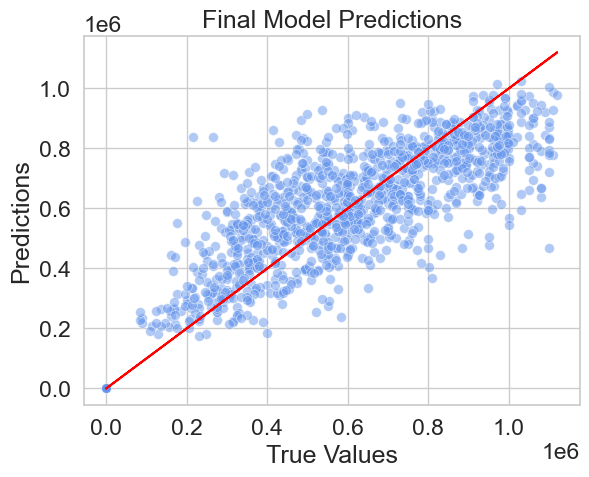

-------------------------
Using the model: RandomForestRegressor()
The mean absolute error is: 35080.310
The mean squared error is: 7107704241.225
The root mean squared error is: 84307.202
The R2 is:  0.924
The Adjusted R2 is:  0.924


In [97]:
sns.set_style('whitegrid')
# plot the predictions
sns.scatterplot(x=y_test, y=Predictions, s=50, alpha=0.5, color='cornflowerblue')

# plot the ideal predictions line
plt.plot(y_test, y_test, color='red', linestyle='-')

# set the title and labels
plt.title('Final Model Predictions')
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.show()

MAE = mean_absolute_error(y_test,Predictions)
MSE = mean_squared_error(y_test,Predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,Predictions)
R2_adj = 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("-------------------------")
print('\033[1m' + "Using the model: " + str(FinalModel) + '\033[0m')
print("The mean absolute error is: %6.3f" % (MAE))
print("The mean squared error is: %6.3f" % (MSE))
print("The root mean squared error is: %6.3f" % (RMSE))
print("The R2 is: %6.3f" % (R2))
print("The Adjusted R2 is: %6.3f" % (R2_adj))